In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
bcw_train = pd.read_csv(os.path.join('/content/drive/MyDrive/Datasets/SI_final_project', 'bcw_train.csv'))
bcw_test = pd.read_csv(os.path.join('/content/drive/MyDrive/Datasets/SI_final_project', 'bcw_test.csv'))

Mounted at /content/drive


In [2]:
print(f'Train data shape: {bcw_train.shape}')
print(f'Test data shape: {bcw_test.shape}')

Train data shape: (381, 11)
Test data shape: (188, 11)


## Training GNB

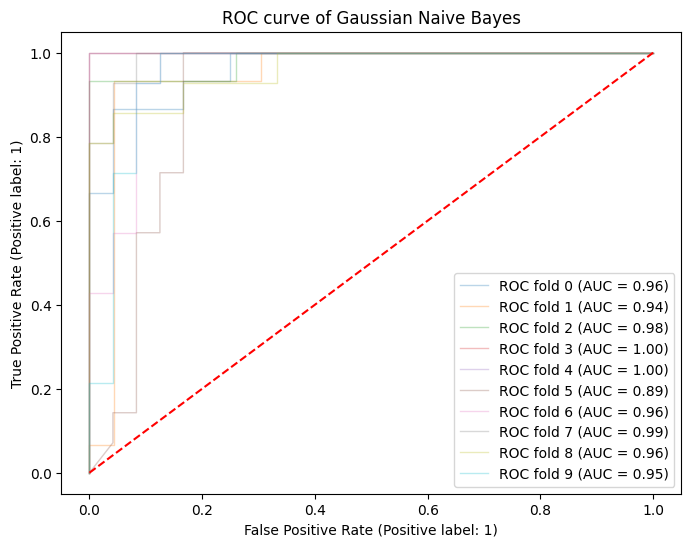

\begin{tabular}{lllll}
\toprule
{} & Accuracy & Precision & Recall & F1-Score \\
\midrule
Fold 0 &      0.8 &       0.9 &    0.7 &      0.8 \\
Fold 1 &      0.9 &       0.9 &    0.8 &      0.9 \\
Fold 2 &      0.9 &       0.9 &    0.9 &      0.9 \\
Fold 3 &      1.0 &       1.0 &    0.9 &      1.0 \\
Fold 4 &      0.9 &       1.0 &    0.7 &      0.8 \\
Fold 5 &      0.8 &       0.8 &    0.6 &      0.7 \\
Fold 6 &      0.9 &       0.8 &    0.8 &      0.8 \\
Fold 7 &      0.9 &       1.0 &    0.8 &      0.9 \\
Fold 8 &      0.9 &       1.0 &    0.8 &      0.9 \\
Fold 9 &      0.9 &       0.9 &    0.9 &      0.9 \\
\bottomrule
\end{tabular}



In [36]:
# Import CV related libraries
from sklearn.model_selection import StratifiedKFold
# Import performance related libraries
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             f1_score, confusion_matrix, RocCurveDisplay)

metrics_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                          index=[f"Fold {i}" for i in np.arange(0, 10)])

# Import ML model
from sklearn.naive_bayes import GaussianNB

scv = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
X, y = bcw_train.drop('target', axis=1), bcw_train['target']

fig, ax = plt.subplots(figsize=(8,6))
for i, (train, validation) in enumerate(scv.split(X, y)):
  gnb = GaussianNB()
  gnb.fit(X.iloc[train], y.iloc[train]) # Note that train and validation are indexes among X and y !!
  RocCurveDisplay.from_estimator(gnb, X.iloc[validation], y.iloc[validation], name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)

  y_pred = gnb.predict(X.iloc[validation])
  # We save the metrics
  metrics_df.loc[f'Fold {i}', 'Accuracy'] = accuracy_score(y.iloc[validation], y_pred)
  metrics_df.loc[f'Fold {i}', 'Precision'] = precision_score(y.iloc[validation], y_pred)
  metrics_df.loc[f'Fold {i}', 'Recall'] = recall_score(y.iloc[validation], y_pred)
  metrics_df.loc[f'Fold {i}', 'F1-Score'] = f1_score(y.iloc[validation], y_pred)


ax.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), 'r--', label='y=x')
plt.title('ROC curve of Gaussian Naive Bayes')
plt.show()

print(metrics_df.to_latex(index=True,
                  float_format="{:.1f}".format,
))

In [37]:

print(metrics_df.agg(['max', 'min', 'mean', 'std']).to_latex(index=True,
                  float_format="{:.1f}".format,
))

\begin{tabular}{lrrrr}
\toprule
{} &  Accuracy &  Precision &  Recall &  F1-Score \\
\midrule
max  &       1.0 &        1.0 &     0.9 &       1.0 \\
min  &       0.8 &        0.8 &     0.6 &       0.7 \\
mean &       0.9 &        0.9 &     0.8 &       0.8 \\
std  &       0.1 &        0.1 &     0.1 &       0.1 \\
\bottomrule
\end{tabular}



# Test

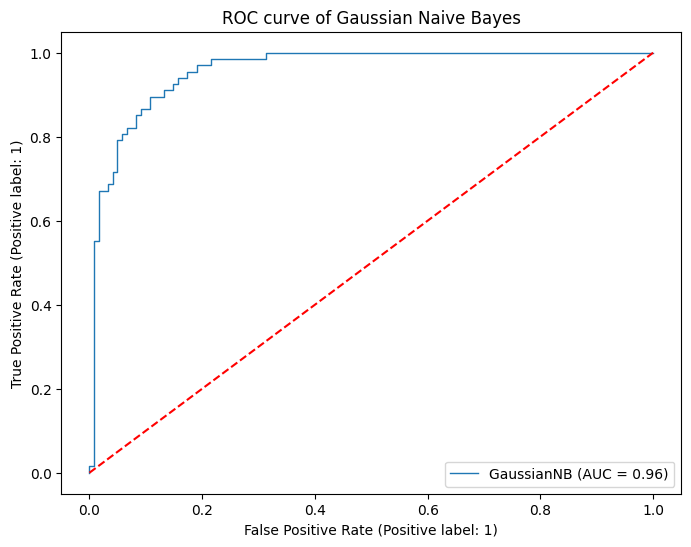

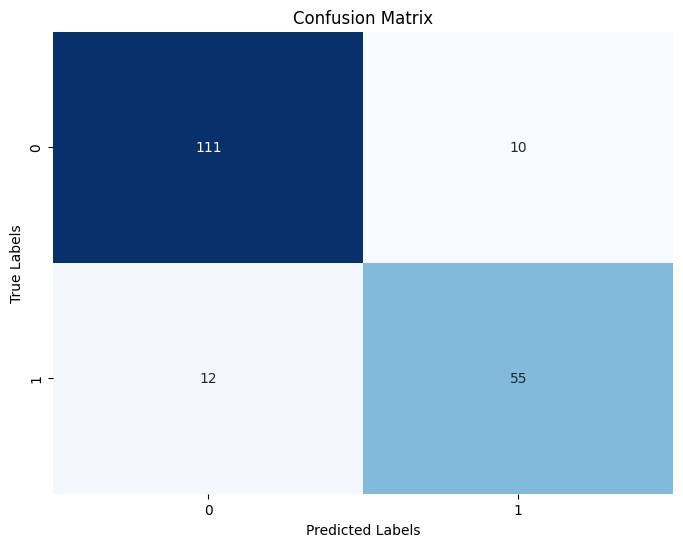

,Accuracy,Precision,Recall,F1-Score,Model
0,0.882979,0.882979,0.820896,0.833333,GNB


In [46]:
X, y = bcw_test.drop('target', axis=1), bcw_test['target']
fig, ax = plt.subplots(figsize=(8,6))
RocCurveDisplay.from_estimator(gnb, X, y, lw=1, ax=ax)
plt.title('ROC curve of Gaussian Naive Bayes')
ax.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), 'r--', label='y=x')
plt.show()

y_pred = (gnb.predict_proba(X)[:, 1] >= 0.4).astype(int)
final_metrics = pd.DataFrame(data={'Accuracy': accuracy_score(y, y_pred),
                                   'Precision': accuracy_score(y, y_pred),
                                   'Recall': recall_score(y, y_pred),
                                   'F1-Score': f1_score(y, y_pred)}, index=[0])
final_metrics['Model'] = 'GNB'

# Compute the confusion matrix
cm = confusion_matrix(y, y_pred)
# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
final_metrics

In [47]:
final_metrics.to_csv(os.path.join('/content/drive/MyDrive/Datasets/SI_final_project', 'model_metrics.csv'), index=False)